# 1단계: 탐색적 데이터 분석 (EDA)

## 📊 California Housing Dataset 분석

이 노트북에서는 California Housing Dataset을 로드하고 기초적인 탐색적 데이터 분석을 수행합니다.

### 학습 목표
1. California Housing Dataset 이해하기
2. 데이터의 기본 통계량 파악
3. 결측값 및 이상치 확인
4. 특성 간의 상관관계 분석
5. 데이터 시각화

In [1]:
# 필요한 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.datasets import fetch_california_housing

# 시각화 설정
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

# pandas 표시 옵션
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 3)

print("✅ 라이브러리 import 완료")

✅ 라이브러리 import 완료


In [2]:
# California Housing Dataset 로드
california_housing = fetch_california_housing()

# 데이터셋 정보 출력
print("📈 California Housing Dataset")
print(f"특성 개수: {len(california_housing.feature_names)}")
print(f"샘플 개수: {california_housing.data.shape[0]}")
print(f"타겟 변수: {california_housing.target_names}")

print("\n🏷️ 특성 이름:")
for i, feature in enumerate(california_housing.feature_names):
    print(f"{i+1:2d}. {feature}")

📈 California Housing Dataset
특성 개수: 8
샘플 개수: 20640
타겟 변수: ['MedHouseVal']

🏷️ 특성 이름:
 1. MedInc
 2. HouseAge
 3. AveRooms
 4. AveBedrms
 5. Population
 6. AveOccup
 7. Latitude
 8. Longitude


In [3]:
# 데이터프레임 생성
df = pd.DataFrame(
    california_housing.data, 
    columns=california_housing.feature_names
)
df['MedHouseVal'] = california_housing.target

print("📊 데이터프레임 기본 정보")
print(f"데이터 크기: {df.shape}")
print(f"메모리 사용량: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# 처음 5행 표시
print("\n🔍 첫 5행 데이터:")
df.head()

📊 데이터프레임 기본 정보
데이터 크기: (20640, 9)
메모리 사용량: 1.42 MB

🔍 첫 5행 데이터:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.325,41.0,6.984,1.024,322.0,2.556,37.88,-122.23,4.526
1,8.301,21.0,6.238,0.972,2401.0,2.110,37.86,-122.22,3.585
2,7.257,52.0,8.288,1.073,496.0,2.802,37.85,-122.24,3.521
3,5.643,52.0,5.817,1.073,558.0,2.548,37.85,-122.25,3.413
4,3.846,52.0,6.282,1.081,565.0,2.181,37.85,-122.25,3.422


In [4]:
# 데이터셋 설명 출력
print("📝 데이터셋 설명:")
print(california_housing.DESCR[:1500])  # 처음 1500자만 표시

📝 데이터셋 설명:
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one

In [5]:
# 기본 통계량 확인
print("📊 기본 통계량")
df.describe()

📊 기본 통계량


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000,20640.000,20640.000,20640.000,20640.000,20640.000,20640.000,20640.000,20640.000
mean,3.871,28.639,5.429,1.097,1425.477,3.071,35.632,-119.570,2.069
std,1.900,12.586,2.474,0.474,1132.462,10.386,2.136,2.004,1.154
min,0.500,1.000,0.846,0.333,3.000,0.692,32.540,-124.350,0.150
25%,2.563,18.000,4.441,1.006,787.000,2.430,33.930,-121.800,1.196
50%,3.535,29.000,5.229,1.049,1166.000,2.818,34.260,-118.490,1.797
75%,4.743,37.000,6.052,1.100,1725.000,3.282,37.710,-118.010,2.647
max,15.000,52.000,141.909,34.067,35682.000,1243.333,41.950,-114.310,5.000


In [6]:
# 데이터 타입 및 결측값 확인
print("🔍 데이터 타입 및 결측값 정보")
info_df = pd.DataFrame({
    'Data Type': df.dtypes,
    'Non-Null Count': df.count(),
    'Null Count': df.isnull().sum(),
    'Null Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
print(info_df)

🔍 데이터 타입 및 결측값 정보
            Data Type  Non-Null Count  Null Count  Null Percentage
MedInc        float64           20640           0              0.0
HouseAge      float64           20640           0              0.0
AveRooms      float64           20640           0              0.0
AveBedrms     float64           20640           0              0.0
Population    float64           20640           0              0.0
AveOccup      float64           20640           0              0.0
Latitude      float64           20640           0              0.0
Longitude     float64           20640           0              0.0
MedHouseVal   float64           20640           0              0.0


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_47780\472323291.py:18: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_47780\472323291.py:18: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_47780\472323291.py:18: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_47780\472323291.py:18: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_47780\472323291.py:18: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_47780\472323291.py:18:

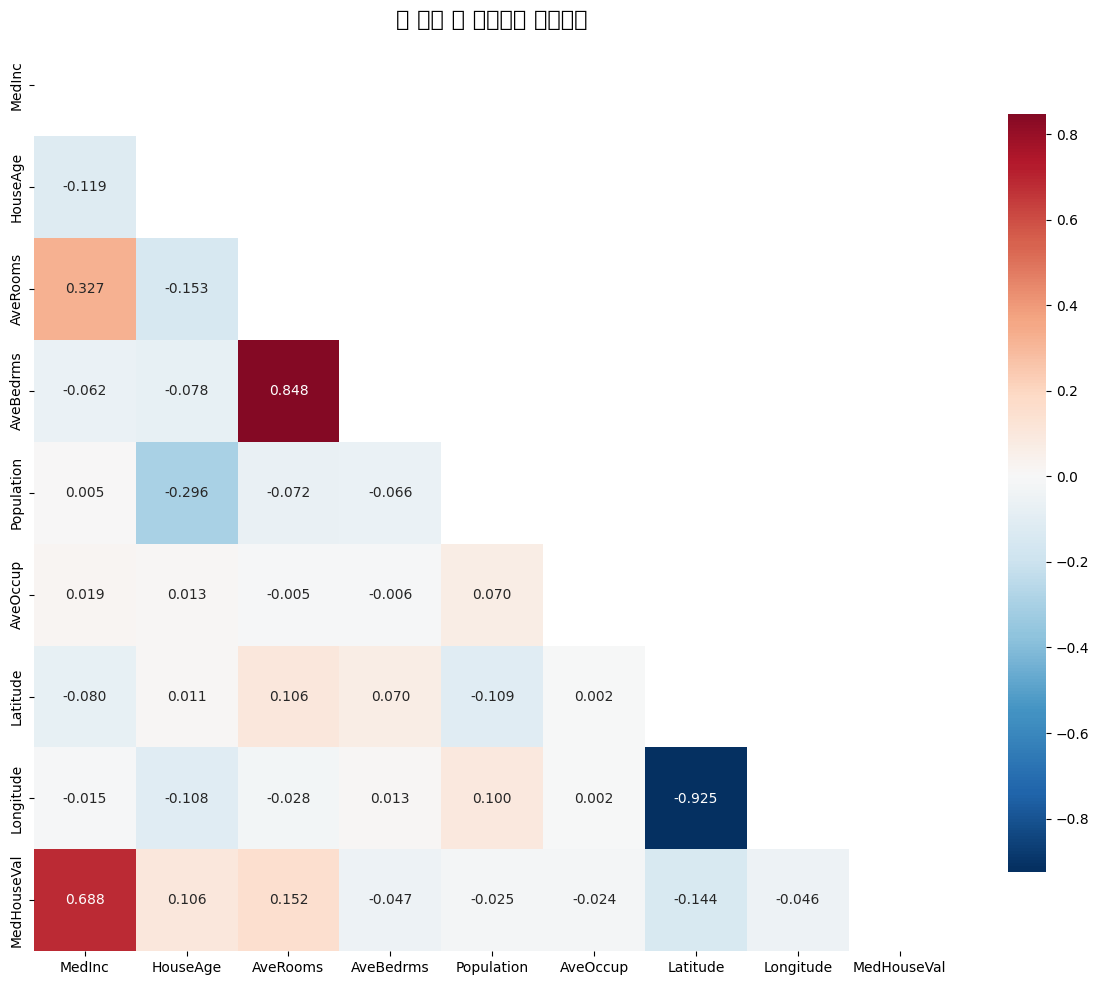


🎯 타겟(주택 가격)과의 상관관계 (절댓값 기준):
MedInc         : 0.688
AveRooms       : 0.152
Latitude       : 0.144
HouseAge       : 0.106
AveBedrms      : 0.047
Longitude      : 0.046
Population     : 0.025
AveOccup       : 0.024


In [8]:
# 상관관계 매트릭스
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()

# 히트맵 생성
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(
    correlation_matrix, 
    mask=mask,
    annot=True, 
    cmap='RdBu_r', 
    center=0,
    fmt='.3f',
    square=True,
    cbar_kws={"shrink": .8}
)
plt.title('🔗 특성 간 상관관계 매트릭스', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 타겟과 높은 상관관계를 가진 특성 확인
target_corr = correlation_matrix['MedHouseVal'].abs().sort_values(ascending=False)
print("\n🎯 타겟(주택 가격)과의 상관관계 (절댓값 기준):")
for feature, corr in target_corr.items():
    if feature != 'MedHouseVal':
        print(f"{feature:15s}: {corr:.3f}")

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_47780\2660593006.py:12: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_47780\2660593006.py:12: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_47780\2660593006.py:12: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_47780\2660593006.py:12: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_47780\2660593006.py:12: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:1

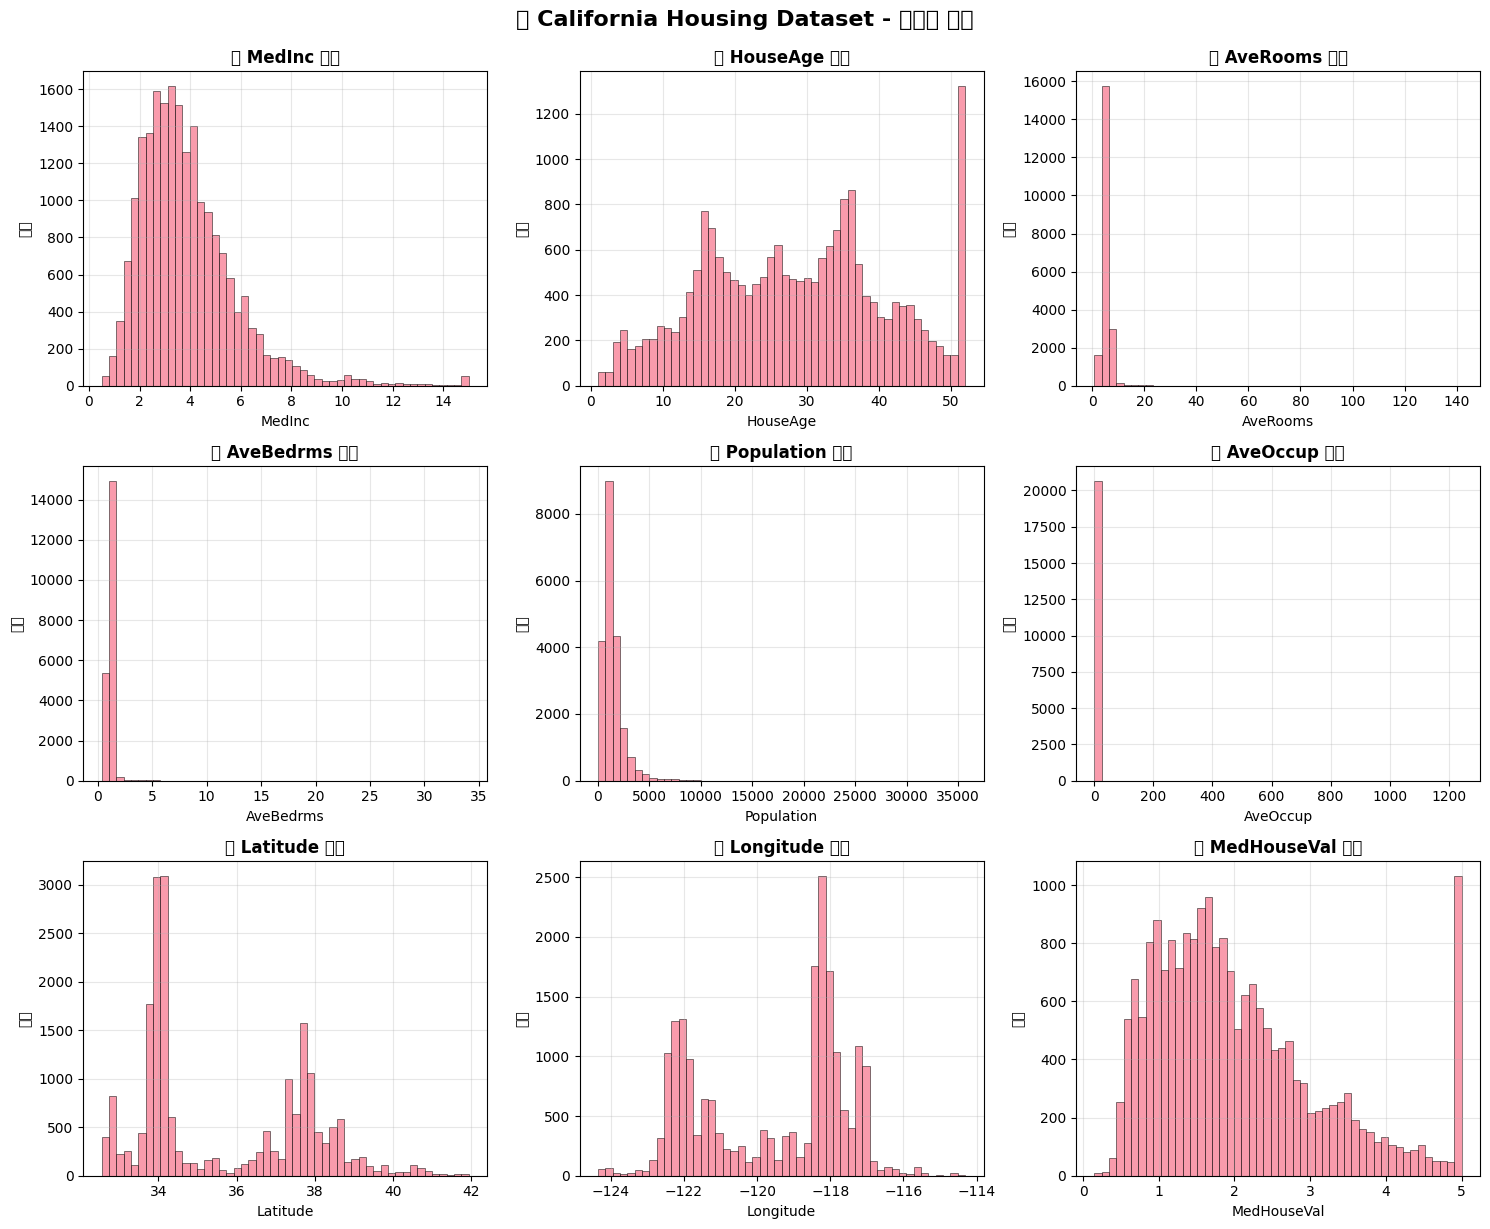

In [9]:
# 분포 시각화 - 히스토그램
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, column in enumerate(df.columns):
    axes[i].hist(df[column], bins=50, alpha=0.7, edgecolor='black', linewidth=0.5)
    axes[i].set_title(f'📈 {column} 분포', fontweight='bold')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('빈도')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('🏠 California Housing Dataset - 특성별 분포', y=1.02, fontsize=16, fontweight='bold')
plt.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_47780\2759261198.py:13: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_47780\2759261198.py:13: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_47780\2759261198.py:13: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_47780\2759261198.py:13: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_47780\2759261198.py:13: UserWarning: Glyph 47215 (\N{HANGUL SYLLABLE ROS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarnin

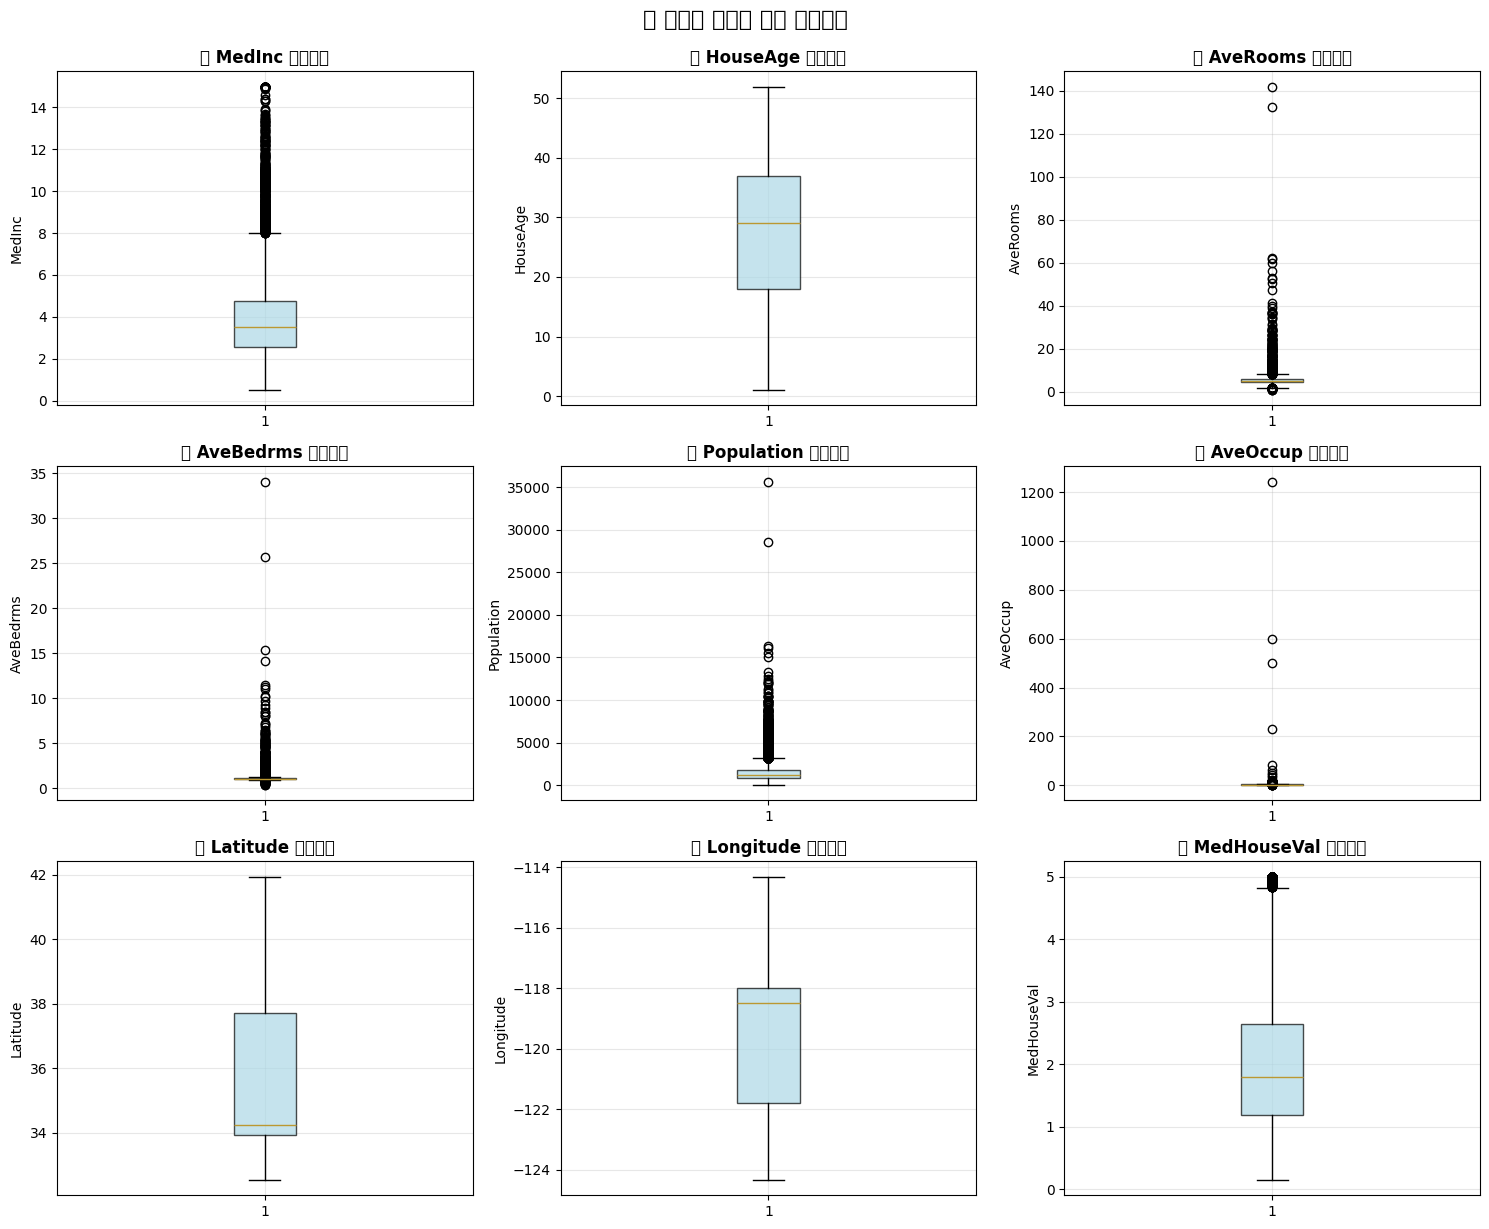

In [10]:
# 박스플롯으로 이상치 확인
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, column in enumerate(df.columns):
    bp = axes[i].boxplot(df[column], patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    bp['boxes'][0].set_alpha(0.7)
    axes[i].set_title(f'📦 {column} 박스플롯', fontweight='bold')
    axes[i].set_ylabel(column)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('📊 이상치 확인을 위한 박스플롯', y=1.02, fontsize=16, fontweight='bold')
plt.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_47780\3493001368.py:16: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_47780\3493001368.py:16: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_47780\3493001368.py:16: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_47780\3493001368.py:16: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_47780\3493001368.py:16: UserWarning: Glyph 52888 (\N{HANGUL SYLLABLE KAEL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_47780\3493001368.py:1

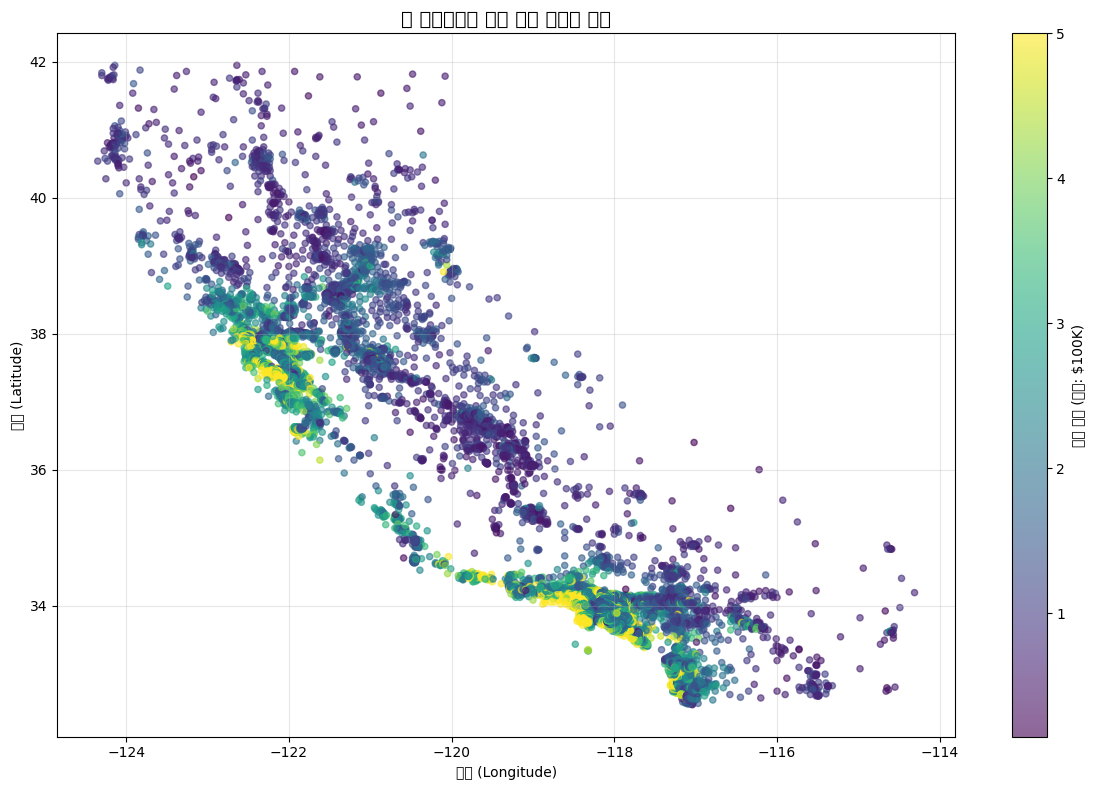

In [11]:
# 지리적 데이터 시각화 (위도, 경도 활용)
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df['Longitude'], 
    df['Latitude'], 
    c=df['MedHouseVal'], 
    cmap='viridis', 
    alpha=0.6,
    s=20
)
plt.colorbar(scatter, label='주택 가격 (단위: $100K)')
plt.xlabel('경도 (Longitude)')
plt.ylabel('위도 (Latitude)')
plt.title('🗺️ 캘리포니아 주택 가격 지리적 분포', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_47780\243679749.py:23: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_47780\243679749.py:23: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_47780\243679749.py:23: UserWarning: Glyph 48128 (\N{HANGUL SYLLABLE MIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_47780\243679749.py:23: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_47780\243679749.py:23: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_47780\243679749.py:23: 

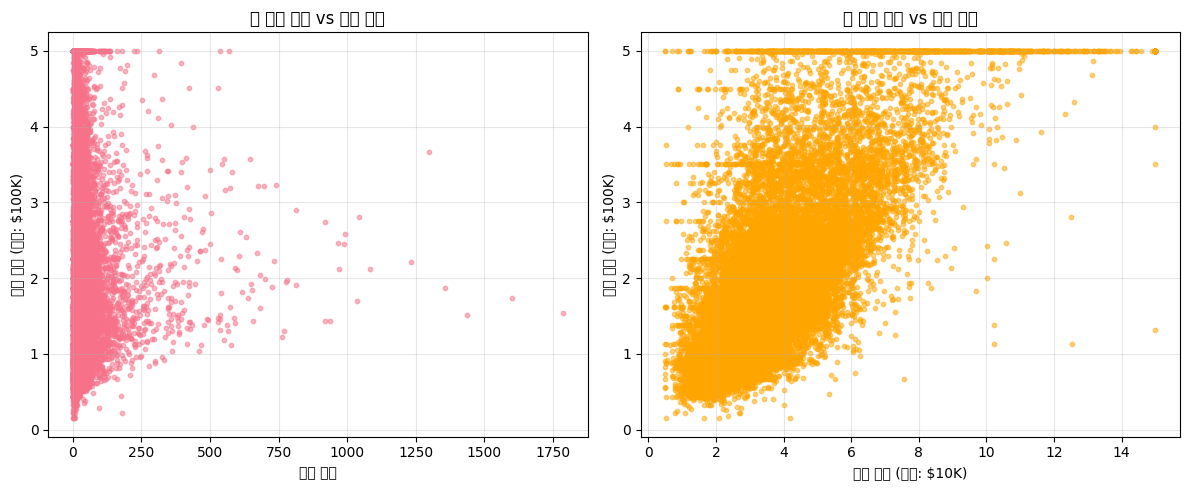

인구 밀도와 주택 가격 상관관계: 0.005
중위 소득과 주택 가격 상관관계: 0.688


In [12]:
# 인구 밀도와 주택 가격의 관계
# 인구 밀도 = Population / (평균 가구당 인원 수 * 총 가구 수)
df['PopulationDensity'] = df['Population'] / (df['AveOccup'] * df['HouseAge'])

plt.figure(figsize=(12, 5))

# 서브플롯 1: 인구 밀도 vs 주택 가격
plt.subplot(1, 2, 1)
plt.scatter(df['PopulationDensity'], df['MedHouseVal'], alpha=0.5, s=10)
plt.xlabel('인구 밀도')
plt.ylabel('주택 가격 (단위: $100K)')
plt.title('👥 인구 밀도 vs 주택 가격')
plt.grid(True, alpha=0.3)

# 서브플롯 2: 평균 소득 vs 주택 가격
plt.subplot(1, 2, 2)
plt.scatter(df['MedInc'], df['MedHouseVal'], alpha=0.5, s=10, color='orange')
plt.xlabel('중위 소득 (단위: $10K)')
plt.ylabel('주택 가격 (단위: $100K)')
plt.title('💰 중위 소득 vs 주택 가격')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 상관관계 확인
print(f"인구 밀도와 주택 가격 상관관계: {df['PopulationDensity'].corr(df['MedHouseVal']):.3f}")
print(f"중위 소득과 주택 가격 상관관계: {df['MedInc'].corr(df['MedHouseVal']):.3f}")

In [13]:
# 주요 통계 요약
print("📋 주요 발견사항 요약")
print("=" * 50)
print(f"• 전체 데이터 수: {len(df):,}개")
print(f"• 특성 수: {len(df.columns)-1}개")
print(f"• 결측값: {'없음' if df.isnull().sum().sum() == 0 else '있음'}")
print(f"• 주택 가격 범위: ${df['MedHouseVal'].min():.1f}K ~ ${df['MedHouseVal'].max():.1f}K")
print(f"• 주택 가격 평균: ${df['MedHouseVal'].mean():.1f}K")
print(f"• 중위 소득 범위: ${df['MedInc'].min():.1f}K ~ ${df['MedInc'].max():.1f}K")

print("\n🔍 중요한 특성들 (타겟과의 상관관계 기준):")
important_features = target_corr.head(4).index.tolist()
important_features.remove('MedHouseVal')
for i, feature in enumerate(important_features, 1):
    corr_value = target_corr[feature]
    print(f"{i}. {feature}: {corr_value:.3f}")

print("\n✅ EDA 완료! 다음 단계에서는 정규화 효과를 비교해보겠습니다.")

📋 주요 발견사항 요약
• 전체 데이터 수: 20,640개
• 특성 수: 9개
• 결측값: 없음
• 주택 가격 범위: $0.1K ~ $5.0K
• 주택 가격 평균: $2.1K
• 중위 소득 범위: $0.5K ~ $15.0K

🔍 중요한 특성들 (타겟과의 상관관계 기준):
1. MedInc: 0.688
2. AveRooms: 0.152
3. Latitude: 0.144

✅ EDA 완료! 다음 단계에서는 정규화 효과를 비교해보겠습니다.


In [14]:
# 데이터 저장 (다음 단계에서 사용)
df.to_csv('../data/california_housing_processed.csv', index=False)
print("💾 처리된 데이터를 'data/california_housing_processed.csv'에 저장했습니다.")

💾 처리된 데이터를 'data/california_housing_processed.csv'에 저장했습니다.
